### LOAD DATA

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("nrao_projects.csv")

In [4]:
print(data)

        project_code                                      project_title  \
0     2018.1.01205.L  Fifty AU STudy of the chemistry in the disk/en...   
1     2022.1.00316.L  COMPASS: Complex Organic Molecules in Protosta...   
2     2017.1.00161.L  ALCHEMI: the ALMA Comprehensive High-resolutio...   
3     2021.1.01616.L  ALMA JELLY - Survey of Nearby Jellyfish and Ra...   
4     2021.1.00869.L  Bulge symmetry or not? The hidden dynamics of ...   
...              ...                                                ...   
4523  2022.1.01740.V  A detailed study of the sub-pc jet of BL Lacer...   
4524  2018.1.01465.V  Disorder vs. Order: Discerning the nature of t...   
4525  2021.1.00767.V              Ultra-high resolution imaging of 3C84   
4526  2019.1.00183.V  Imaging Jet and Magnetic Field near the Spinni...   
4527  2022.1.00710.V  First subparsec-scale imaging of the new TeV g...   

                                       project_abstract fs_type  
0     The huge variety of planeta

In [5]:
print(data['project_abstract'].iloc[0])

The huge variety of planetary systems discovered in recent decades likely depends on the early history of their formation. The proposed FAUST Large Program focuses specifically on the early history of Solar-like protostars and their chemical diversity at scales of ~50 au, where planets are expected to form. In particular, the goal of the project is to reveal and quantify the variety of chemical composition of the envelope/disk system at scales of 50 au in a sample of Class 0 and I protostars representative of the chemical diversity observed at larger scales. For each source, we propose 50 au spatial resolution observations of a set of molecules able to: (1) disentangle the components of the 50-2000 au envelope/disk system; (2) characterise the organic complexity in each of them; (3) probe their ionization structure; (4) measure their molecular deuteration. The output will be a homogeneous database of thousands of images from different lines and species, i.e., an unprecedented source-su

### LOAD PACKAGES

In [6]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arnavboppudi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/arnavboppudi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
import numpy as np
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import json

#### Preprocessing step that removes stop-words

In [8]:
stopWords = set(stopwords.words('english'))

#### Preprocessor Function

In [9]:
def preprocessor(text):
    # Check if the text is a string
    if not isinstance(text, str):
        return ""

    # Tokenize the text
    tokens = word_tokenize(text)

    # Set of English stopwords
    stopWords = set(stopwords.words('english'))

    # Join words not in stopwords
    return " ".join([word for word in tokens if word.lower() not in stopWords])

#### Apply preprocessor function on project_abstract column

In [10]:
data['cleaned_project_abstract'] = data['project_abstract'].apply(preprocessor)

huge variety planetary systems discovered recent decades likely depends early history formation . proposed FAUST Large Program focuses specifically early history Solar-like protostars chemical diversity scales ~50 au , planets expected form . particular , goal project reveal quantify variety chemical composition envelope/disk system scales 50 au sample Class 0 protostars representative chemical diversity observed larger scales . source , propose 50 au spatial resolution observations set molecules able : ( 1 ) disentangle components 50-2000 au envelope/disk system ; ( 2 ) characterise organic complexity ; ( 3 ) probe ionization structure ; ( 4 ) measure molecular deuteration . output homogeneous database thousands images different lines species , i.e. , unprecedented source-survey chemical diversity Solar-like protostars 50 au scales . FAUST provide community legacy dataset milestone astrochemistry star formation studies .


#### Splitting data

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

data['cleaned_abstract'] = data['project_abstract'].apply(preprocessor)
train_data, test_data = train_test_split(data, test_size=0.25, random_state=42)

### LDA CLASS

In [12]:
class LDA_Model:
    def __init__(self, N_topics=3):
        self.N_topics = N_topics
        self.countVectorizer = CountVectorizer(stop_words='english')
        self.lda = LatentDirichletAllocation(n_components=self.N_topics)
    
    def fit(self, corpus):
        termFrequency = self.countVectorizer.fit_transform(corpus)
        self.lda.fit(termFrequency)
        return self.lda.transform(termFrequency)

    # Additional method to transform new data
    def transform(self, corpus):
        termFrequency = self.countVectorizer.transform(corpus)
        return self.lda.transform(termFrequency)

#### Initialize Model

In [13]:
lda_model = LDA_Model(N_topics=5)

#### Fit model on training set

In [14]:
train_topics = lda_model.fit(train_data['cleaned_abstract'])

In [15]:
train_topics

array([[0.40802132, 0.58608836, 0.00196503, 0.00196433, 0.00196096],
       [0.2230884 , 0.63287122, 0.14192172, 0.00105728, 0.00106138],
       [0.2060284 , 0.78729682, 0.00223207, 0.00222838, 0.00221434],
       ...,
       [0.4953158 , 0.23544371, 0.00176155, 0.00175934, 0.2657196 ],
       [0.00185829, 0.85205167, 0.00185197, 0.00184495, 0.14239313],
       [0.19531096, 0.44844155, 0.35268593, 0.00175818, 0.00180338]])

In [16]:
words = lda_model.countVectorizer.get_feature_names_out()

In [17]:
N = 10 #number of top words to show
topic_components = lda_model.lda.components_

for topic_idx, topic in enumerate(topic_components):
    print(f"Topic {topic_idx}:")
    # Get the indices of the top N words for this topic
    top_word_indices = topic.argsort()[-N:][::-1]
    # Print these words with their weights
    for word_idx in top_word_indices:
        print(f"{words[word_idx]} (weight: {topic[word_idx]:.2f})")
    print("\n")

Topic 0:
gas (weight: 2269.82)
molecular (weight: 1886.00)
star (weight: 1733.05)
formation (weight: 1407.36)
mass (weight: 1081.42)
high (weight: 944.19)
dense (weight: 777.98)
observations (weight: 750.53)
propose (weight: 661.58)
alma (weight: 594.50)


Topic 1:
galaxies (weight: 2479.02)
gas (weight: 1308.19)
galaxy (weight: 1064.29)
star (weight: 925.10)
alma (weight: 896.48)
formation (weight: 892.65)
observations (weight: 795.83)
propose (weight: 652.50)
high (weight: 608.48)
redshift (weight: 604.86)


Topic 2:
observations (weight: 951.33)
dust (weight: 858.62)
alma (weight: 716.69)
emission (weight: 705.87)
star (weight: 705.70)
resolution (weight: 692.86)
high (weight: 563.08)
gas (weight: 548.42)
jet (weight: 541.48)
field (weight: 533.98)


Topic 3:
disk (weight: 2179.50)
disks (weight: 1465.37)
observations (weight: 1126.14)
dust (weight: 898.84)
alma (weight: 851.36)
formation (weight: 803.49)
propose (weight: 743.49)
mass (weight: 717.72)
gas (weight: 695.91)
planet (we

### TOPIC 0: Disk and Star Formation Studies

### TOPIC 1: Molecular Gas and Galaxy Observations

### TOPIC 2: Chemical Analysis and Solar Studies

### TOPIC 3: Dust Emission and Jet Observations

### TOPIC 4: Galaxy Formation and High-Redshift Galaxies

#### Train Classifier

In [18]:
encoder = LabelEncoder() #one-hot encoding
train_labels = encoder.fit_transform(train_data['fs_type']) #array of integers that were label encoded to the data in the 'fs_type' column

rf = RandomForestClassifier()
rf.fit(train_topics, train_labels)

RandomForestClassifier()

### Predict on Test Data

In [23]:
test_topics = lda_model.transform(test_data['cleaned_abstract'])
test_labels = encoder.transform(test_data['fs_type'])
predictions = rf.predict(test_topics)

In [24]:
from sklearn.metrics import roc_auc_score

# Assuming classifier is a binary classifier
test_probabilities = rf.predict_proba(test_topics)[:, 1]  # Get probabilities for the positive class

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
auc_roc = roc_auc_score(test_labels, test_probabilities)

print(f"Model Accuracy: {accuracy}")
print(f"Model AUC-ROC: {auc_roc}")


Model Accuracy: 0.8144876325088339
Model AUC-ROC: 0.7838864942528736


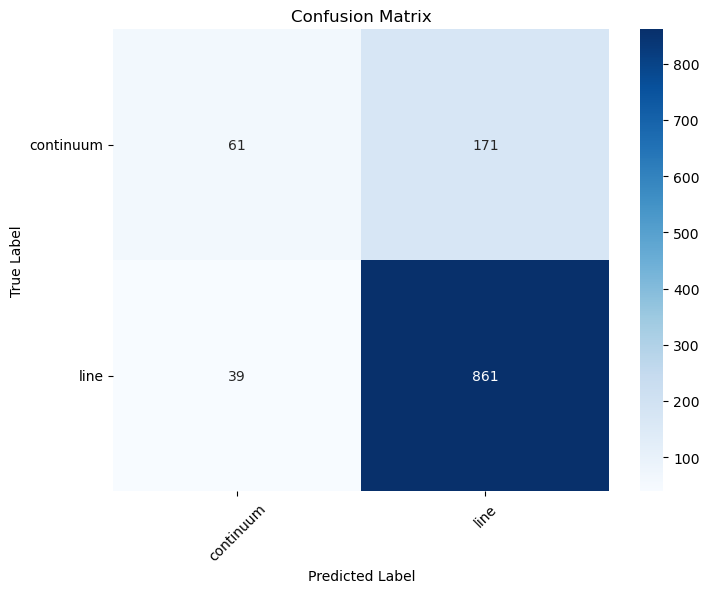

In [22]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming test_labels and predictions are already defined
cm = confusion_matrix(test_labels, predictions)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# If you want to show the class names on the axes
class_names = encoder.classes_
tick_marks = np.arange(len(class_names)) + 0.5
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names, rotation=0)

plt.show()

### SVC using Titles

In [85]:
from sklearn.svm import SVC
data['cleaned_project_title'] = data['project_title'].apply(preprocessor)

In [86]:
data

,project_code,project_title,project_abstract,fs_type,cleaned_project_abstract,cleaned_abstract,cleaned_project_title
0,2018.1.01205.L,Fifty AU STudy of the chemistry in the disk/en...,The huge variety of planetary systems discover...,line,huge variety planetary systems discovered rece...,huge variety planetary systems discovered rece...,Fifty AU STudy chemistry disk/envelope system ...
1,2022.1.00316.L,COMPASS: Complex Organic Molecules in Protosta...,The emergence of complex organic molecules in ...,line,emergence complex organic molecules interstell...,emergence complex organic molecules interstell...,COMPASS : Complex Organic Molecules Protostars...
2,2017.1.00161.L,ALCHEMI: the ALMA Comprehensive High-resolutio...,A great variety in gas composition is observed...,line,great variety gas composition observed within ...,great variety gas composition observed within ...,ALCHEMI : ALMA Comprehensive High-resolution E...
3,2021.1.01616.L,ALMA JELLY - Survey of Nearby Jellyfish and Ra...,We propose the first ever statistical survey o...,line,propose first ever statistical survey molecula...,propose first ever statistical survey molecula...,ALMA JELLY - Survey Nearby Jellyfish Ram Press...
4,2021.1.00869.L,Bulge symmetry or not? The hidden dynamics of ...,A radio survey of red giant SiO sources in the...,line,radio survey red giant SiO sources inner Galax...,radio survey red giant SiO sources inner Galax...,Bulge symmetry ? hidden dynamics Far Side
...,...,...,...,...,...,...,...
4523,2022.1.01740.V,A detailed study of the sub-pc jet of BL Lacer...,AGN jets are key objects to broaden our knowle...,line,AGN jets key objects broaden knowledge Univers...,AGN jets key objects broaden knowledge Univers...,detailed study sub-pc jet BL Lacertae mm-wavel...
4524,2018.1.01465.V,Disorder vs. Order: Discerning the nature of t...,We propose using a combined ALMA+GMVA array to...,line,propose using combined ALMA+GMVA array map pol...,propose using combined ALMA+GMVA array map pol...,Disorder vs. Order : Discerning nature magneti...
4525,2021.1.00767.V,Ultra-high resolution imaging of 3C84,3C84 is a prime target for high angular resolu...,line,3C84 prime target high angular resolution stud...,3C84 prime target high angular resolution stud...,Ultra-high resolution imaging 3C84
4526,2019.1.00183.V,Imaging Jet and Magnetic Field near the Spinni...,Understanding the jet formation in supermassiv...,line,Understanding jet formation supermassive black...,Understanding jet formation supermassive black...,Imaging Jet Magnetic Field near Spinning SMBH M87


In [88]:
#Split data
train_data, test_data = train_test_split(data, test_size=0.25, random_state=42)

In [100]:
#LDA models on cleaned title dat 
lda_model_2 = LDA_Model(N_topics=5)
train_topics = lda_model_2.fit(train_data['cleaned_project_title'])

In [90]:
#Label Encoding
encoder = LabelEncoder()
train_labels = encoder.fit_transform(train_data['fs_type'])

### SVM Classifer

In [91]:
svm_classifier = SVC()
svm_classifier.fit(train_topics, train_labels)

SVC()

In [93]:
# Test data transformation
test_topics = lda_model_2.transform(test_data['cleaned_project_title'])
test_labels = encoder.transform(test_data['fs_type'])

In [94]:
# Predictions
predictions = svm_classifier.predict(test_topics)

In [96]:
#Accuracy score
accuracy = accuracy_score(test_labels, predictions)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.7950530035335689


#### Topic Breakdown

In [98]:
lda_model_2 = LDA_Model(N_topics=5)
lda_model_2.fit(data['cleaned_project_title'])

array([[0.9188739 , 0.0201237 , 0.0201754 , 0.02006776, 0.02075924],
       [0.02241445, 0.02237341, 0.90956863, 0.02256785, 0.02307566],
       [0.02260461, 0.45510143, 0.02230341, 0.47761673, 0.02237382],
       ...,
       [0.03356031, 0.03477766, 0.03334207, 0.03448495, 0.86383502],
       [0.02231551, 0.02265496, 0.02229933, 0.02241516, 0.91031504],
       [0.01783686, 0.01769149, 0.92848755, 0.01762987, 0.01835423]])

In [101]:
# Get the feature names (words in the vocabulary)
words = lda_model_2.countVectorizer.get_feature_names_out()

# Number of top words to show for each topic
N = 10

# Get the components (topics) from the LDA model
topic_components = lda_model_2.lda.components_

# For each topic, get the top words
for topic_idx, topic in enumerate(topic_components):
    print(f"Topic {topic_idx}:")
    # Get the indices of the top N words for this topic
    top_word_indices = topic.argsort()[-N:][::-1]
    # Print these words with their weights
    for word_idx in top_word_indices:
        print(f"{words[word_idx]} (weight: {topic[word_idx]:.2f})")
    print("\n")

Topic 0:
molecular (weight: 165.99)
massive (weight: 87.52)
outflow (weight: 84.19)
gas (weight: 72.62)
structure (weight: 69.89)
cloud (weight: 69.55)
magnetic (weight: 67.42)
star (weight: 65.40)
jet (weight: 65.03)
clouds (weight: 61.60)


Topic 1:
alma (weight: 133.78)
disk (weight: 103.71)
galaxy (weight: 47.70)
galaxies (weight: 44.39)
imaging (weight: 43.54)
cosmic (weight: 36.72)
disks (weight: 36.41)
molecular (weight: 35.90)
agn (weight: 29.30)
gas (weight: 27.66)


Topic 2:
disk (weight: 104.80)
alma (weight: 42.72)
physical (weight: 38.38)
protoplanetary (weight: 34.82)
mapping (weight: 32.22)
properties (weight: 29.66)
galaxy (weight: 29.49)
planetary (weight: 26.39)
mass (weight: 25.69)
disks (weight: 24.84)


Topic 3:
disks (weight: 142.91)
formation (weight: 132.24)
star (weight: 111.22)
dust (weight: 99.54)
gas (weight: 98.42)
molecular (weight: 82.50)
protoplanetary (weight: 67.99)
disk (weight: 65.23)
probing (weight: 63.93)
galaxy (weight: 54.42)


Topic 4:
galaxies

### TOPIC 0: Molecular Structures and Star Formation

### TOPIC 1: ALMA Observations of Galaxies and Cosmic Structures

### TOPIC 2: Protoplanetary Disks and Galaxy Properties

### TOPIC 3: Star and Disk Formation in Molecular Clouds

### TOPIC 4: Star Formation in Galaxies

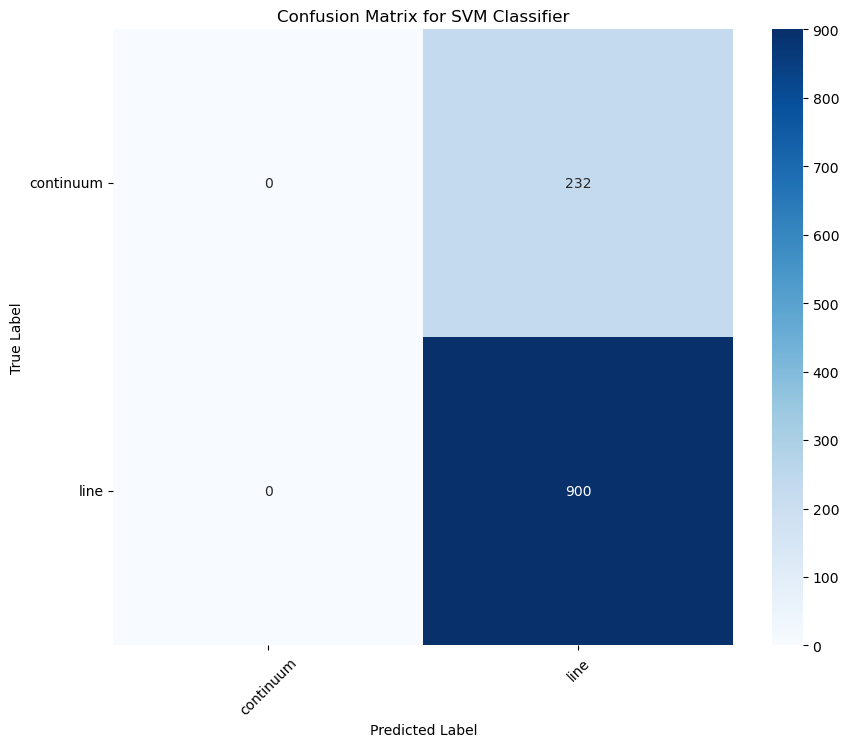

In [102]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have trained your SVM classifier and made predictions on the test set
# test_labels and predictions are the true labels and SVM predictions of your test set, respectively

# Generate the confusion matrix
cm = confusion_matrix(test_labels, predictions)

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for SVM Classifier')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Adjust label ticks if necessary
class_names = encoder.classes_
tick_marks = np.arange(len(class_names)) + 0.5
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names, rotation=0)

plt.show()

#### Reduce the dimensionality of the LDA to 2-D using the PCA (Principal Component Analysis)

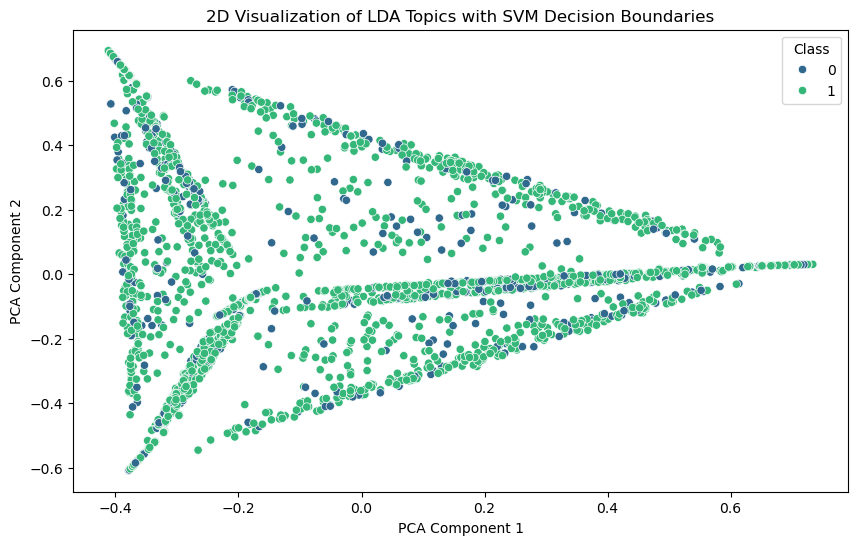

In [105]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce LDA topic dimensions to 2
pca = PCA(n_components=2)
train_topics_2d = pca.fit_transform(train_topics)
test_topics_2d = pca.transform(test_topics)

# Concatenate the reduced train and test topics for plotting
all_topics_2d = np.vstack([train_topics_2d, test_topics_2d])

# Concatenate train and test labels for coloring the plot
all_labels = np.concatenate([train_labels, test_labels])

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=all_topics_2d[:, 0], y=all_topics_2d[:, 1], hue=all_labels, palette='viridis')

# Add plot labels and title
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D Visualization of LDA Topics with SVM Decision Boundaries')
plt.legend(title='Class', loc='best')

plt.show()